Инициализация

In [33]:
using Plots 
using StatsPlots
using DataFrames
using CSV

Big   = "../Logs/LogTestBig1-2-3_copy.csv"
Read = "../Logs/LogRead.csv"
Shuffle  = "../Logs/LogShuffle1k.csv"

df_big = CSV.File(Big) |> DataFrame
df_shuffle = CSV.File(Shuffle) |> DataFrame
df_read = CSV.File(Read) |> DataFrame

,run_nr,file_id,ch_num,all_points,compresion_type,quant_points
,Int64,String31,Int64,Int64,String7,Int64
1,0,/small-1000-UNCOMP.parquet,0,0,UNCOMP,1000
2,1,/small-1000-GZIP.parquet,0,0,GZIP,1000
3,2,/small-1000-ZSTD.parquet,0,0,ZSTD,1000
4,3,/small-1000-SNAPPY.parquet,0,0,SNAPPY,1000
5,4,/small-5000-UNCOMP.parquet,0,0,UNCOMP,5000
6,5,/small-5000-GZIP.parquet,0,0,GZIP,5000
7,6,/small-5000-ZSTD.parquet,0,0,ZSTD,5000
8,7,/small-5000-SNAPPY.parquet,0,0,SNAPPY,5000
9,8,/small-10000-UNCOMP.parquet,0,0,UNCOMP,10000


Зависимость времени записи от размера кванта 

По графику видно, что, начиная примерно с кванта = 10000, время записи меняется незначительно и остаётся достаточно малым  

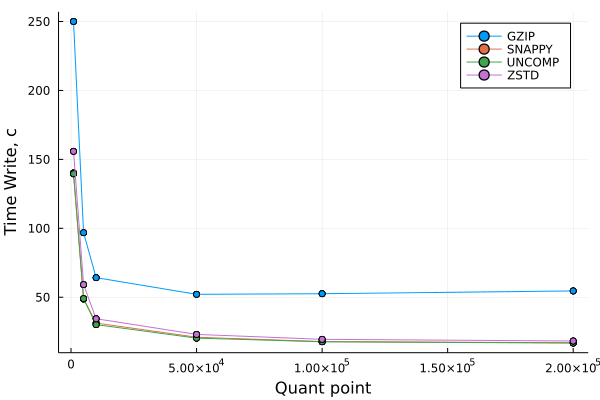

In [27]:
@df df_big plot(:quant_points, 
            :time_write, 
            group = :compresion_type, 
            xlabel = "Quant point",
            ylabel = "Time Write, c",
            marker = :circle)
# savefig("Plots/BigWrite_t(read_t).png")


Зависимость коеффициента сжатия от размера кванта

Аналогично с прошлым графиком - коеффициент сжатия перестаёт значительно изеняться, начиная с кванта = 10000 точек.

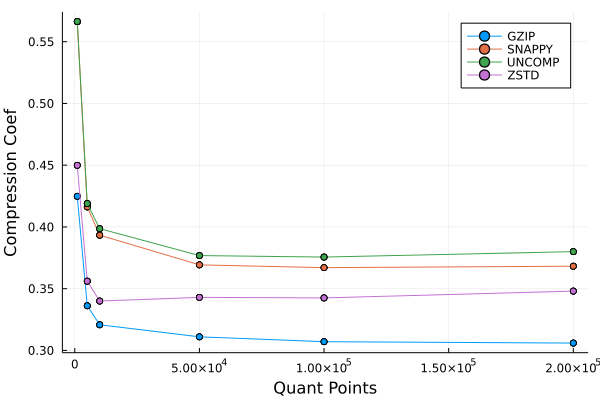

In [28]:
@df df_big plot(:quant_points, 
            :compression_coef, 
            group = :compresion_type,
            xlabel = "Quant Points",
            ylabel = "Compression Coef", 
            marker = :circle)
# savefig("Plots/BigCompression_coef(quant_points).png")

Зависимость времени чтения интервала от его размера (расхождения связаны с разными типами сжатия (выделены цветом) и разными размерами кванта записи (никак не выделены))

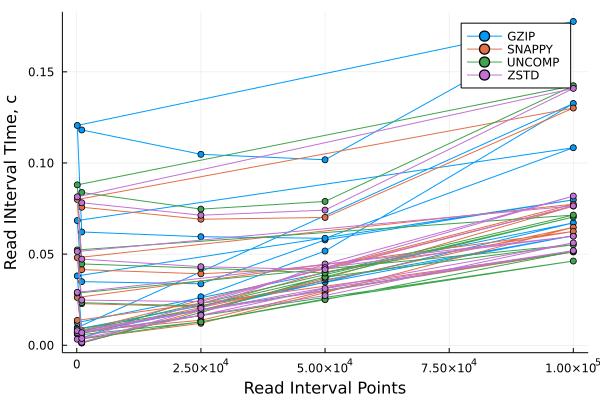

In [29]:
@df df_big plot(:read_interval_points, 
            :read_interval_time, 
            group = :compresion_type, 
            xlabel = "Read Interval Points",
            ylabel = "Read INterval TIme, c",
            marker = :circle)
# savefig("Plots/BigRead_interval_time(read_interval_points).png")

Зависимость времени случайного чтения файла от размера квантов, которыми он записан. (для размера порции случайного чтения = 1000 точек)

Файл читается максимально быстро при кванте = 10000 точек (возможно, имеет место алгоритмическая ошибка - нужно проверить), при этом начиная с 50000 точек чёткой зависимости нету (хоть время и сильно больше)

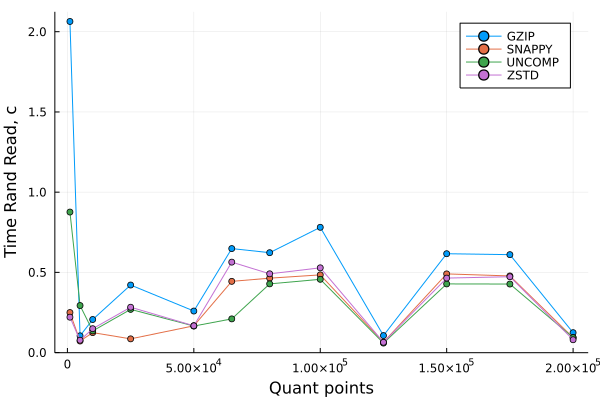

In [38]:
@df df_shuffle plot(:quant_points, 
            :time_read, 
            group = :compresion_type, 
            xlabel = "Quant points",
            ylabel = "Time Rand Read, c",
            marker = :circle)

Зависимость врмени чтения одного кванта от его размера

Как и ожидалось - прямая зависимость. При маленьких размерах кванта "плато" не наблюдается (если оно и етсь, то на ещё более маленьких квантах, которые, по опыту других графиков, нам не интересны).

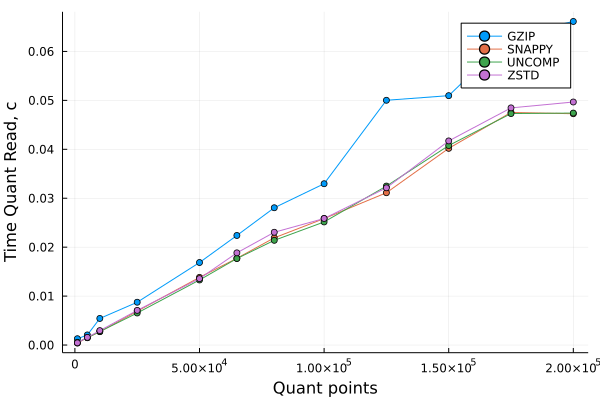

In [35]:
@df df_read plot(:quant_points, 
            :time_read_quant, 
            group = :compresion_type, 
            xlabel = "Quant points",
            ylabel = "Time Quant Read, c",
            marker = :circle)